In [8]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('./data/amazon_products_sales_data_uncleaned.csv')

print("Data Berhasil Dimuat!")

Data Berhasil Dimuat!


In [9]:
# Melihat 5 data teratas dan informasi kolom
print("\n--- 5 Data Teratas ---")
display(df.head())

print("\n--- Info Dataset ---")
df.info()


--- 5 Data Teratas ---


,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29



--- Info Dataset ---
<class 'pandas.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   title                     42675 non-null  str  
 1   rating                    41651 non-null  str  
 2   number_of_reviews         41651 non-null  str  
 3   bought_in_last_month      39458 non-null  str  
 4   current/discounted_price  30926 non-null  str  
 5   price_on_variant          42675 non-null  str  
 6   listed_price              42675 non-null  str  
 7   is_best_seller            42675 non-null  str  
 8   is_sponsored              42675 non-null  str  
 9   is_couponed               42675 non-null  str  
 10  buy_box_availability      28022 non-null  str  
 11  delivery_details          30955 non-null  str  
 12  sustainability_badges     3408 non-null   str  
 13  image_url                 42675 non-null  str  
 14  product_url               4

In [10]:
import re

# Buat salinan agar data asli tetap aman
df_clean = df.copy()

# Cleaning Rating (Ambil angka depannya saja)
df_clean['rating'] = df_clean['rating'].str.extract(r'(\d+\.\d+)').astype(float)
    # mengubah menjadi format angka (float) agar bisa dihitung secara statistik.

# Cleaning Number of Reviews
df_clean['number_of_reviews'] = df_clean['number_of_reviews'].str.replace(',', '', regex=False).str.extract(r'(\d+)').astype(float)
    # menghapus tanda koma pada angka dan mengekstrak karakter digit saja untuk diubah menjadi format angka desimal (float) agar bisa dihitung

# Cleaning Bought in Last Month (FIXED dengan Regex)
def clean_bought_robust(x):
    if pd.isna(x): return 0
    x = str(x).lower()

    # Cari pola angka atau angka dengan K (misal: 10K)
    match = re.search(r'(\d+k|\d+)', x)
    if match:
        val = match.group(1)
        if 'k' in val:
            return float(val.replace('k', '')) * 1000
        return float(val)
    return 0 # Kalau isinya teks deskripsi balikin 0

df_clean['bought_in_last_month'] = df_clean['bought_in_last_month'].apply(clean_bought_robust)
    # mengubah teks penjualan seperti "10K+ bought" menjadi angka murni (10000)

# Cleaning Price (regex)
def clean_price(x):
    if pd.isna(x): return np.nan
    match = re.search(r'(\d+\.\d+|\d+)', str(x).replace(',', ''))
    if match:
        return float(match.group(1))
    return np.nan

df_clean['current_price'] = df_clean['current/discounted_price'].apply(clean_price)
df_clean['original_price'] = df_clean['listed_price'].apply(clean_price)
    # membersihkan harga dengan menghapus tanda koma dan mengekstrak angka murni (termasuk desimal)

# Cek hasil (sementara)
print("--- Hasil Cleaning Numerik (Setelah Perbaikan) ---")
display(df_clean[['rating', 'number_of_reviews', 'bought_in_last_month', 'current_price', 'original_price']].head())
df_clean.info()

--- Hasil Cleaning Numerik (Setelah Perbaikan) ---


,rating,number_of_reviews,bought_in_last_month,current_price,original_price
0,4.6,375.0,300.0,89.68,159.00
1,4.3,2457.0,6000.0,9.99,15.99
2,4.6,3044.0,2000.0,314.00,349.00
3,4.6,35882.0,10000.0,NaN,NaN
4,4.8,28988.0,10000.0,NaN,NaN


<class 'pandas.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     42675 non-null  str    
 1   rating                    41651 non-null  float64
 2   number_of_reviews         41651 non-null  float64
 3   bought_in_last_month      42675 non-null  float64
 4   current/discounted_price  30926 non-null  str    
 5   price_on_variant          42675 non-null  str    
 6   listed_price              42675 non-null  str    
 7   is_best_seller            42675 non-null  str    
 8   is_sponsored              42675 non-null  str    
 9   is_couponed               42675 non-null  str    
 10  buy_box_availability      28022 non-null  str    
 11  delivery_details          30955 non-null  str    
 12  sustainability_badges     3408 non-null   str    
 13  image_url                 42675 non-null  str    
 14  product_url      

In [11]:
# Cleaning is_best_seller (Target Variabel)
# ubah: 'Best Seller' jadi 1, sisanya jadi 0
df_clean['is_best_seller'] = df_clean['is_best_seller'].apply(lambda x: 1 if str(x).strip() == 'Best Seller' else 0)

# Cleaning is_sponsored
# ubah: 'Sponsored' jadi 1, 'Organic' jadi 0
df_clean['is_sponsored'] = df_clean['is_sponsored'].apply(lambda x: 1 if str(x).strip() == 'Sponsored' else 0)

# Cleaning is_couponed
# ubah: Jika ada kata 'Save' atau 'Coupon' jadi 1, 'No Coupon' jadi 0
df_clean['is_couponed'] = df_clean['is_couponed'].apply(lambda x: 1 if 'coupon' in str(x).lower() or 'save' in str(x).lower() else 0)

# Cleaning buy_box_availability
# ubah: 'Add to cart' jadi 1, sisanya (NaN atau lainnya) jadi 0
df_clean['buy_box_availability'] = df_clean['buy_box_availability'].apply(lambda x: 1 if str(x).strip() == 'Add to cart' else 0)

# Feature Engineering Sederhana: Discount Percentage
# Rumus: ((Original - Current) / Original) * 100
# Kita isi original_price yang kosong dengan current_price (asumsi tidak ada diskon)
df_clean['original_price'] = df_clean['original_price'].fillna(df_clean['current_price'])
df_clean['discount_percentage'] = ((df_clean['original_price'] - df_clean['current_price']) / df_clean['original_price']) * 100
df_clean['discount_percentage'] = df_clean['discount_percentage'].fillna(0) # Jika harga 0

# memilih kolom yang sudah bersih
cols_to_keep = [
    'is_best_seller', 'rating', 'number_of_reviews', 'bought_in_last_month',
    'current_price', 'original_price', 'discount_percentage',
    'is_sponsored', 'is_couponed', 'buy_box_availability'
]
df_model = df_clean[cols_to_keep].copy()

print("--- Hasil Cleaning Kategori & Target ---")
display(df_model.head())
print("\nJumlah Best Seller vs Bukan:")
print(df_model['is_best_seller'].value_counts())

--- Hasil Cleaning Kategori & Target ---


,is_best_seller,rating,number_of_reviews,bought_in_last_month,current_price,original_price,discount_percentage,is_sponsored,is_couponed,buy_box_availability
0,0,4.6,375.0,300.0,89.68,159.00,43.597484,1,1,1
1,0,4.3,2457.0,6000.0,9.99,15.99,37.523452,1,1,1
2,0,4.6,3044.0,2000.0,314.00,349.00,10.028653,1,1,1
3,1,4.6,35882.0,10000.0,NaN,NaN,0.000000,0,1,0
4,0,4.8,28988.0,10000.0,NaN,NaN,0.000000,0,1,0



Jumlah Best Seller vs Bukan:
is_best_seller
0    42400
1      275
Name: count, dtype: int64


In [12]:
# Menangani Missing Values (Imputasi)
# Untuk Rating dan Number of Reviews, isi dengan Median
df_model['rating'] = df_model['rating'].fillna(df_model['rating'].median())
df_model['number_of_reviews'] = df_model['number_of_reviews'].fillna(df_model['number_of_reviews'].median())

# Untuk Harga, isi juga dengan median
df_model['current_price'] = df_model['current_price'].fillna(df_model['current_price'].median())
df_model['original_price'] = df_model['original_price'].fillna(df_model['original_price'].median())

# Cek apakah masih ada data kosong
print("--- Cek Missing Values Akhir ---")
print(df_model.isnull().sum())

# Statistik Deskriptif
print("\n--- Statistik Deskriptif ---")
display(df_model.describe())

# Korelasi antar fitur (Melihat apa yang paling berpengaruh ke Best Seller)
print("\n--- Korelasi dengan Target (is_best_seller) ---")
correlation = df_model.corr()['is_best_seller'].sort_values(ascending=False)
print(correlation)

--- Cek Missing Values Akhir ---
is_best_seller          0
rating                  0
number_of_reviews       0
bought_in_last_month    0
current_price           0
original_price          0
discount_percentage     0
is_sponsored            0
is_couponed             0
buy_box_availability    0
dtype: int64

--- Statistik Deskriptif ---


,is_best_seller,rating,number_of_reviews,bought_in_last_month,current_price,original_price,discount_percentage,is_sponsored,is_couponed,buy_box_availability
count,42675.000000,42675.000000,42675.000000,42675.000000,42675.000000,42675.000000,42675.000000,42675.000000,42675.0,42675.000000
mean,0.006444,4.401844,3021.260316,975.620504,175.272999,189.801515,6.230771,0.164288,1.0,0.656637
std,0.080017,0.382636,12880.020115,5513.457101,337.386543,370.142426,12.512043,0.370541,0.0,0.474837
min,0.000000,1.000000,1.000000,0.000000,2.490000,3.590000,0.000000,0.000000,1.0,0.000000
25%,0.000000,4.200000,84.000000,50.000000,38.045000,46.580000,0.000000,0.000000,1.0,0.000000
50%,0.000000,4.500000,343.000000,100.000000,77.000000,80.050000,0.000000,0.000000,1.0,1.000000
75%,0.000000,4.600000,1825.500000,300.000000,129.990000,139.990000,7.407682,0.000000,1.0,1.000000
max,1.000000,5.000000,865598.000000,100000.000000,4699.000000,5399.000000,85.415586,1.000000,1.0,1.000000



--- Korelasi dengan Target (is_best_seller) ---
is_best_seller          1.000000
number_of_reviews       0.191900
bought_in_last_month    0.117611
discount_percentage     0.055601
rating                  0.027318
buy_box_availability    0.010747
is_sponsored            0.007762
original_price         -0.022636
current_price          -0.024340
is_couponed                  NaN
Name: is_best_seller, dtype: float64


Matplotlib is building the font cache; this may take a moment.
C:\Users\agung\AppData\Local\Temp\ipykernel_20036\2832331901.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Bukan', 'Best Seller'])


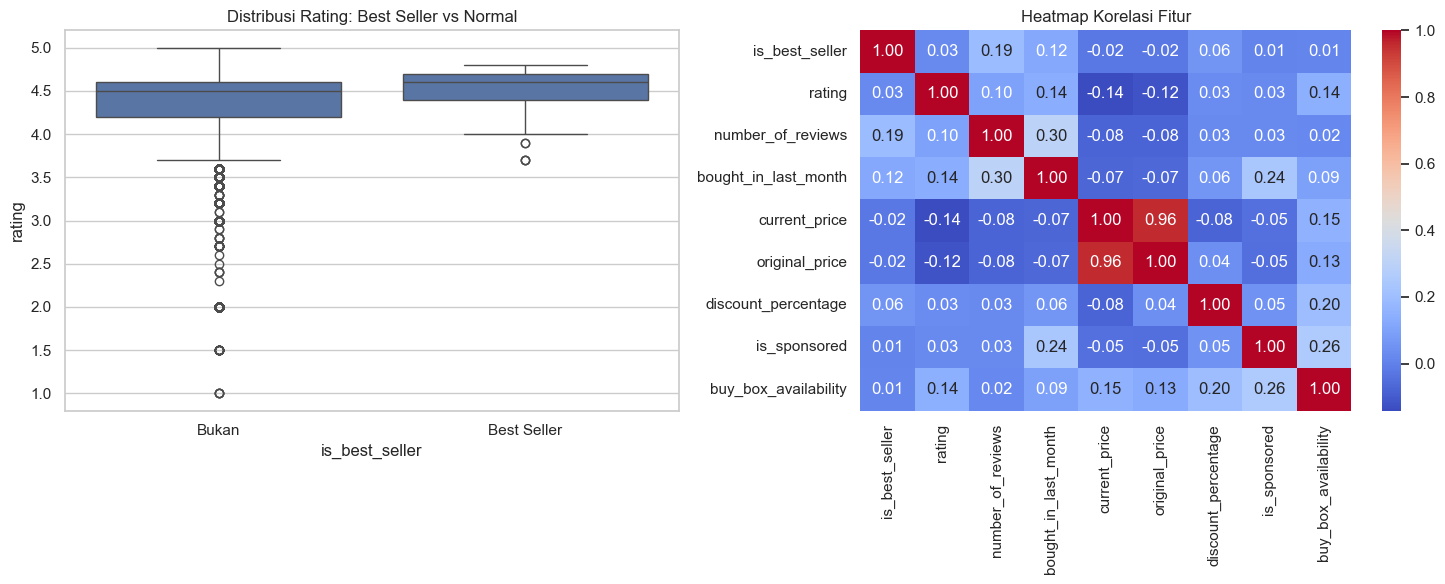

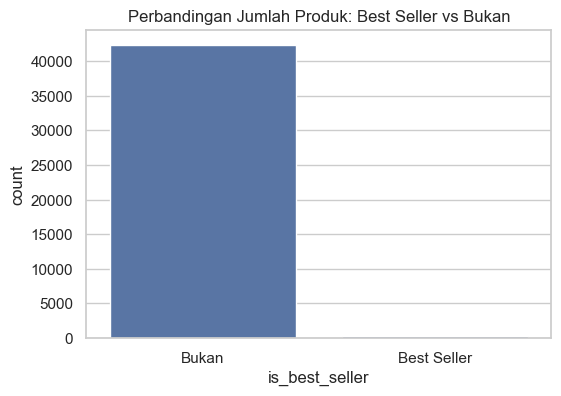

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# Buat subplot 1x2
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Visualisasi Distribusi Rating berdasarkan Best Seller
sns.boxplot(data=df_model, x='is_best_seller', y='rating', ax=axes[0])
axes[0].set_title('Distribusi Rating: Best Seller vs Normal')
axes[0].set_xticklabels(['Bukan', 'Best Seller'])

# Visualisasi Korelasi (Heatmap)
# menghapus is_couponed karena tidak bervariasi
if 'is_couponed' in df_model.columns:
    df_model = df_model.drop(columns=['is_couponed'])

corr_matrix = df_model.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Heatmap Korelasi Fitur')

plt.tight_layout()
plt.show()

# Bar Chart Jumlah Best Seller (Melihat Imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_model, x='is_best_seller')
plt.title('Perbandingan Jumlah Produk: Best Seller vs Bukan')
plt.xticks([0, 1], ['Bukan', 'Best Seller'])
plt.show()

--- Detail Jumlah Produk ---
Bukan Best Seller (0): 42400 produk
Best Seller (1)      : 275 produk
Persentase Best Seller: 0.64%


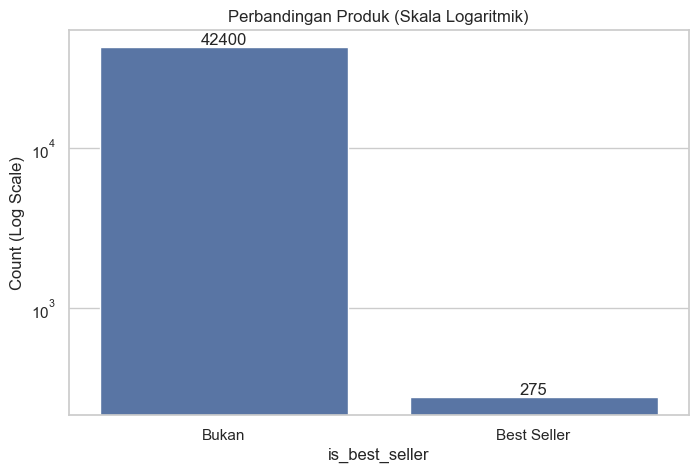

In [15]:
# Melihat angka pasti jumlah Best Seller
print("--- Detail Jumlah Produk ---")
counts = df_model['is_best_seller'].value_counts()
print(f"Bukan Best Seller (0): {counts[0]} produk")
print(f"Best Seller (1)      : {counts[1]} produk")
print(f"Persentase Best Seller: {(counts[1]/len(df_model))*100:.2f}%")

# Visualisasi ulang dengan skala Logaritmik (agar batang yang kecil terlihat)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_model, x='is_best_seller')
plt.yscale('log') # Menggunakan skala log agar perbedaan ribuan vs ratusan bisa dibandingkan secara visual
plt.title('Perbandingan Produk (Skala Logaritmik)')
plt.xticks([0, 1], ['Bukan', 'Best Seller'])
plt.ylabel('Count (Log Scale)')

# Menambahkan label angka di atas batang
for i, count in enumerate(counts.sort_index()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Memisahkan Fitur (X) dan Target (y)
X = df_model.drop(columns=['is_best_seller'])
y = df_model['is_best_seller']

# Membagi data menjadi Training (80%) dan Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menangani Imbalance Data dengan SMOTE (Hanya pada data Training)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Jumlah data training sebelum SMOTE: {len(y_train)}")
print(f"Jumlah data training setelah SMOTE: {len(y_train_res)}")
    # SMOTE berfungsi menciptakan data buatan untuk kategori Best Seller agar jumlahnya seimbang dengan produk biasa, sehingga model bisa belajar mengenali produk populer secara lebih adil.

# Melatih Model 1: Logistic Regression (Baseline)
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_res, y_train_res)

# Melatih Model 2: Random Forest (Model Kompleks)
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(X_train_res, y_train_res)

print("\n--- Model Berhasil Dilatih! ---")

Jumlah data training sebelum SMOTE: 34140
Jumlah data training setelah SMOTE: 67840


c:\Users\agung\Desktop\Web\amazon-best-seller-predictor\backend\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Model Berhasil Dilatih! ---



===== EVALUASI Logistic Regression =====
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      8480
           1       0.04      0.75      0.07        55

    accuracy                           0.88      8535
   macro avg       0.52      0.81      0.50      8535
weighted avg       0.99      0.88      0.93      8535



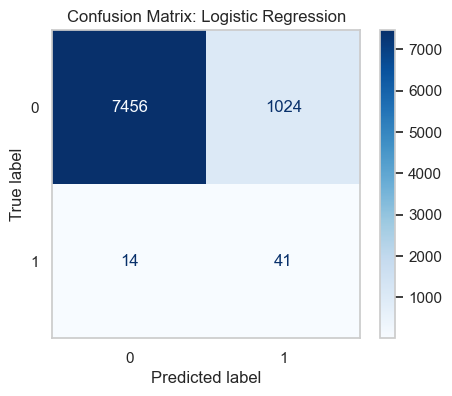


===== EVALUASI Random Forest =====
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8480
           1       0.14      0.69      0.23        55

    accuracy                           0.97      8535
   macro avg       0.57      0.83      0.61      8535
weighted avg       0.99      0.97      0.98      8535



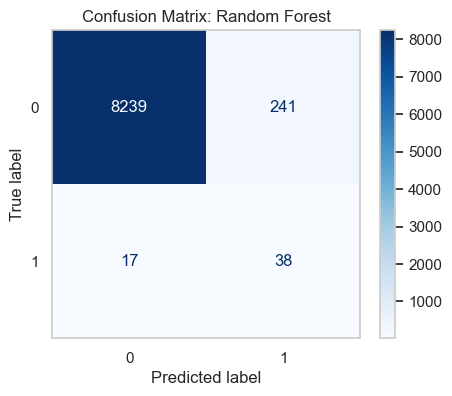

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n===== EVALUASI {model_name} =====")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    fig, ax = plt.subplots(figsize=(5, 4))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.grid(False)
    plt.show()

# Evaluasi Model 1
evaluate_model(model_lr, X_test, y_test, "Logistic Regression")

# Evaluasi Model 2
evaluate_model(model_rf, X_test, y_test, "Random Forest")

In [18]:
import gradio as gr
import pandas as pd
import numpy as np

def predict_best_seller(rating, reviews, bought_last_month, current_price, original_price, is_sponsored, buy_box):
    # Hitung fitur tambahan (discount_percentage) seperti saat training
    discount_pct = 0
    if original_price > 0:
        discount_pct = ((original_price - current_price) / original_price) * 100

    # Susun data input menjadi DataFrame (urutan harus sama dengan X_train)
    # Urutan fitur: rating, number_of_reviews, bought_in_last_month, current_price,
    # original_price, discount_percentage, is_sponsored, buy_box_availability
    input_data = pd.DataFrame([[
        rating, reviews, bought_last_month, current_price,
        original_price, discount_pct,
        1 if is_sponsored == "Ya" else 0,
        1 if buy_box == "Tersedia" else 0
    ]], columns=X.columns)

    # 3. Prediksi menggunakan model Random Forest yang sudah dilatih
    prediction = model_rf.predict(input_data)[0]
    probability = model_rf.predict_proba(input_data)[0][1]

    if prediction == 1:
        return f"HASIL: BEST SELLER! (Probabilitas: {probability:.2%})"
    else:
        return f"HASIL: Bukan Best Seller (Probabilitas: {probability:.2%})"

# 4. Membuat Interface Gradio
demo = gr.Interface(
    fn=predict_best_seller,
    inputs=[
        gr.Slider(0, 5, value=4.5, label="Rating Produk"),
        gr.Number(label="Jumlah Review (Contoh: 500)"),
        gr.Number(label="Terjual Bulan Lalu (Contoh: 1000)"),
        gr.Number(label="Harga Sekarang ($)"),
        gr.Number(label="Harga Asli ($)"),
        gr.Radio(["Ya", "Tidak"], label="Apakah Sponsored/Iklan?"),
        gr.Radio(["Tersedia", "Tidak"], label="Buy Box Availability")
    ],
    outputs="text",
    title="Amazon Best Seller Predictor",
    description="Masukkan data produk untuk memprediksi apakah produk tersebut akan menjadi Best Seller."
)

# Launch!
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://3d1deefde29180fa0a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [21]:
import joblib
# Simpan ke folder models
joblib.dump(model_rf, 'models/amazon_bestseller_predictor.pkl')
print("Model berhasil disimpan di folder models!")

Model berhasil disimpan di folder models!
